# araba fiyat analizi ve tahmini


In [5]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel('merc.xlsx') # exel verisini okundu

In [8]:
df.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [9]:
# tax = vergilendirme
# mpg = ne kadar yaktigini
# enginesize = motor hacmi/kuvveti

In [10]:
df.describe().T # veri setimizi taniyalim

,count,mean,std,min,25%,50%,75%,max
year,13119.0,2017.296288,2.224709,1970.0,2016.0,2018.0,2019.0,2020.0
price,13119.0,24698.596920,11842.675542,650.0,17450.0,22480.0,28980.0,159999.0
mileage,13119.0,21949.559037,21176.512267,1.0,6097.5,15189.0,31779.5,259000.0
tax,13119.0,129.972178,65.260286,0.0,125.0,145.0,145.0,580.0
mpg,13119.0,55.155843,15.220082,1.1,45.6,56.5,64.2,217.3
engineSize,13119.0,2.071530,0.572426,0.0,1.8,2.0,2.1,6.2


In [14]:
df.isnull().sum() # bos verimiz yok 

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

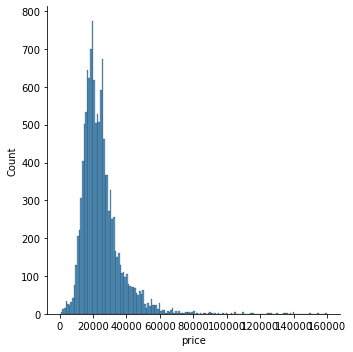

In [15]:
sbn.displot(data = df['price']) # fiyat dagilimi

C:\Users\hasan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

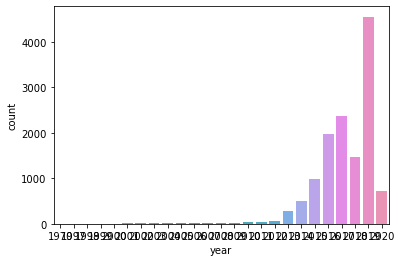

In [16]:
sbn.countplot(df['year'])

In [17]:
df.corr() # korelesayon

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [18]:
df.corr()['price'].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

In [19]:
# milage arttikca fiyat dusuyor yani negatif bi etisi vardir

<AxesSubplot:xlabel='mileage', ylabel='price'>

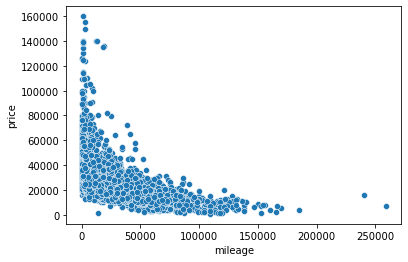

In [21]:
sbn.scatterplot(x='mileage', y= 'price', data=df)

In [22]:
df.sort_values('price', ascending=False).head(25)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [23]:
# yuksek fiyatlari arabalari sayisi hem az hemde grafigimizi bozmaktadir
# bimiz verisetimizda %1 cikarsak herhangi bi sikinti olmaz

In [24]:
len(df)

13119

In [26]:
len(df)*0.01

131.19

In [29]:
newdf = df.sort_values('price', ascending=False).iloc[131:]

In [30]:
newdf.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


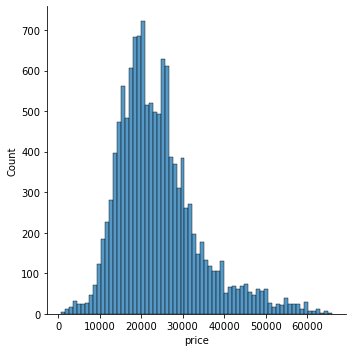

In [34]:
sbn.displot(newdf['price']) # daha duzgun bi grafige sahibiz

In [35]:
newdf.groupby('year').mean()['price']

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [38]:
newdf =newdf[newdf.year != 1970] 
'''1970 verileri cikarttim nedeni ise
yasina gore asiri pahali (cikartilmayabilir cok onemli degil)'''

'1970 verileri cikarttim nedeni ise\nyasina gore asiri pahali (cikartilmayabilir cok onemli degil)'

In [39]:
newdf.groupby('year').mean()['price']

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [40]:
# trassminsin numeric deger degildir bunu cikartabiliriz
newdf = newdf.drop('transmission', axis=1)

In [41]:
y= newdf['price'].values

In [42]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [43]:
x = newdf.drop('price', axis= 1).values

In [44]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [45]:
from sklearn.model_selection import train_test_split

In [50]:
x_train ,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=10)

In [51]:
len(x_test)

3897

In [52]:
len(x_train)

9090

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
# butun degerlerimizi 0-1 arasinda sikistircaz ki modelimizi fazla yormasin

In [55]:
scaler = MinMaxScaler()

In [56]:
x_train = scaler.fit_transform(x_train)

In [57]:
x_test = scaler.fit_transform(x_test)

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [59]:
x_train.shape

(9090, 5)

In [61]:
model=Sequential()
model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [62]:
model.fit(x=x_train, y=y_train,epochs=300, validation_data=(x_test, y_test),batch_size=100)

Epoch 1/300
91/91 [==============================] - 0s 2ms/step - loss: 672117824.0000 - val_loss: 688008640.0000
Epoch 2/300
91/91 [==============================] - 0s 1ms/step - loss: 671599616.0000 - val_loss: 686548544.0000
Epoch 3/300
91/91 [==============================] - 0s 1ms/step - loss: 667109312.0000 - val_loss: 676774464.0000
Epoch 4/300
91/91 [==============================] - 0s 992us/step - loss: 646634048.0000 - val_loss: 640208192.0000
Epoch 5/300
91/91 [==============================] - 0s 1ms/step - loss: 586426304.0000 - val_loss: 548283456.0000
Epoch 6/300
91/91 [==============================] - 0s 1ms/step - loss: 461937536.0000 - val_loss: 386766208.0000
Epoch 7/300
91/91 [==============================] - 0s 1ms/step - loss: 287082912.0000 - val_loss: 206825216.0000
Epoch 8/300
91/91 [==============================] - 0s 1ms/step - loss: 144298672.0000 - val_loss: 110048928.0000
Epoch 9/300
91/91 [==============================] - 0s 960us/step - loss: 938

91/91 [==============================] - 0s 1ms/step - loss: 23499522.0000 - val_loss: 28065976.0000
Epoch 73/300
91/91 [==============================] - 0s 1ms/step - loss: 23375392.0000 - val_loss: 28155338.0000
Epoch 74/300
91/91 [==============================] - 0s 963us/step - loss: 23225014.0000 - val_loss: 28556484.0000
Epoch 75/300
91/91 [==============================] - 0s 1ms/step - loss: 23103808.0000 - val_loss: 28048290.0000
Epoch 76/300
91/91 [==============================] - 0s 927us/step - loss: 23010626.0000 - val_loss: 27567892.0000
Epoch 77/300
91/91 [==============================] - 0s 1ms/step - loss: 22899594.0000 - val_loss: 27563912.0000
Epoch 78/300
91/91 [==============================] - 0s 1ms/step - loss: 22796630.0000 - val_loss: 27222814.0000
Epoch 79/300
91/91 [==============================] - 0s 1ms/step - loss: 22771124.0000 - val_loss: 27313876.0000
Epoch 80/300
91/91 [==============================] - 0s 1ms/step - loss: 22631794.0000 - val_los

91/91 [==============================] - 0s 1ms/step - loss: 20054900.0000 - val_loss: 24817608.0000
Epoch 144/300
91/91 [==============================] - 0s 997us/step - loss: 20020452.0000 - val_loss: 24025676.0000
Epoch 145/300
91/91 [==============================] - 0s 1ms/step - loss: 19999246.0000 - val_loss: 24607644.0000
Epoch 146/300
91/91 [==============================] - 0s 988us/step - loss: 19977604.0000 - val_loss: 24117694.0000
Epoch 147/300
91/91 [==============================] - 0s 1ms/step - loss: 19922406.0000 - val_loss: 23746270.0000
Epoch 148/300
91/91 [==============================] - 0s 967us/step - loss: 19892236.0000 - val_loss: 23486140.0000
Epoch 149/300
91/91 [==============================] - 0s 988us/step - loss: 19903032.0000 - val_loss: 23317460.0000
Epoch 150/300
91/91 [==============================] - 0s 1ms/step - loss: 19855558.0000 - val_loss: 23971602.0000
Epoch 151/300
91/91 [==============================] - 0s 1ms/step - loss: 19803238.00

91/91 [==============================] - 0s 994us/step - loss: 18402078.0000 - val_loss: 21821826.0000
Epoch 214/300
91/91 [==============================] - 0s 987us/step - loss: 18403802.0000 - val_loss: 22515364.0000
Epoch 215/300
91/91 [==============================] - 0s 1ms/step - loss: 18391082.0000 - val_loss: 22736840.0000
Epoch 216/300
91/91 [==============================] - 0s 1ms/step - loss: 18416590.0000 - val_loss: 22502790.0000
Epoch 217/300
91/91 [==============================] - 0s 964us/step - loss: 18351030.0000 - val_loss: 22862388.0000
Epoch 218/300
91/91 [==============================] - 0s 974us/step - loss: 18440630.0000 - val_loss: 21953598.0000
Epoch 219/300
91/91 [==============================] - 0s 987us/step - loss: 18357822.0000 - val_loss: 21920792.0000
Epoch 220/300
91/91 [==============================] - 0s 950us/step - loss: 18379436.0000 - val_loss: 22034944.0000
Epoch 221/300
91/91 [==============================] - 0s 1ms/step - loss: 1833177

91/91 [==============================] - 0s 983us/step - loss: 18106704.0000 - val_loss: 21062224.0000
Epoch 284/300
91/91 [==============================] - 0s 1ms/step - loss: 18110232.0000 - val_loss: 21857422.0000
Epoch 285/300
91/91 [==============================] - 0s 949us/step - loss: 18100424.0000 - val_loss: 21806690.0000
Epoch 286/300
91/91 [==============================] - 0s 934us/step - loss: 18131354.0000 - val_loss: 21690774.0000
Epoch 287/300
91/91 [==============================] - 0s 945us/step - loss: 18093898.0000 - val_loss: 21707542.0000
Epoch 288/300
91/91 [==============================] - 0s 984us/step - loss: 18077400.0000 - val_loss: 21961582.0000
Epoch 289/300
91/91 [==============================] - 0s 944us/step - loss: 18059142.0000 - val_loss: 21532408.0000
Epoch 290/300
91/91 [==============================] - 0s 1ms/step - loss: 18072094.0000 - val_loss: 21225752.0000
Epoch 291/300
91/91 [==============================] - 0s 969us/step - loss: 18115

In [63]:
lossData = pd.DataFrame(model.history.history)

In [64]:
lossData

,loss,val_loss
0,672117824.0,688008640.0
1,671599616.0,686548544.0
2,667109312.0,676774464.0
3,646634048.0,640208192.0
4,586426304.0,548283456.0
...,...,...
295,18047206.0,21757374.0
296,18053672.0,21313676.0
297,18088080.0,21856886.0
298,18078244.0,21437572.0


In [70]:
lossData['loss'].max()

672117824.0

<AxesSubplot:>

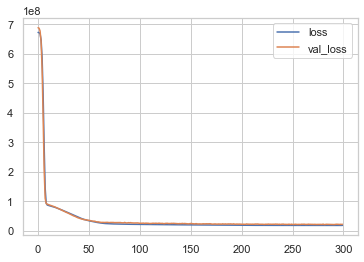

In [74]:

lossData.plot()

In [75]:
# overfitting olusmamis ♥

In [76]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error


In [77]:
tahminDizisi = model.predict(x_test)

In [78]:
tahminDizisi

array([[20019.68 ],
       [21895.031],
       [24135.594],
       ...,
       [24933.734],
       [13321.672],
       [23632.768]], dtype=float32)

In [79]:
mean_absolute_error(y_test, tahminDizisi)

3354.678356720785

In [80]:
# yani yaklasik %13 luk bi fark demektir

In [83]:
newdf.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


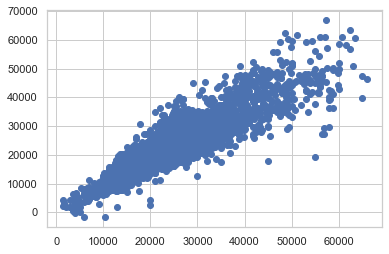

In [84]:
plt.scatter(y_test, tahminDizisi)

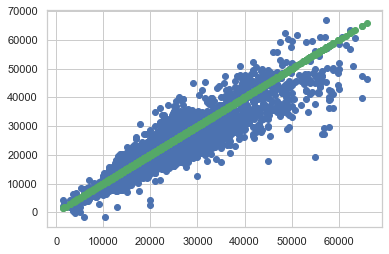

In [86]:
plt.scatter(y_test, tahminDizisi)
plt.plot(y_test,y_test,'go' )

In [88]:
yeniAraba = newdf.drop('price', axis=1).iloc[2]

In [89]:
type(yeniAraba)

pandas.core.series.Series

In [93]:
yeniAraba = scaler.transform(yeniAraba.values.reshape(-1,5))

In [94]:
model.predict(yeniAraba)

array([[61740.027]], dtype=float32)

In [95]:
newdf.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [ ]:
# fiyati 65000 olan arababnin fiyatini 61000 tahmin etti